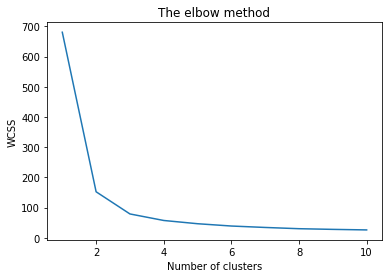

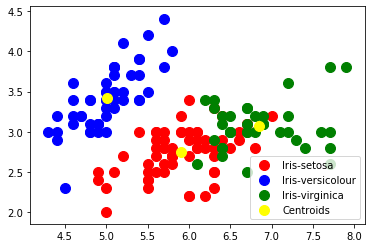

In [2]:
# Clustering algorithm

# 1. K-Mean algorithm

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

#Importing iris dataset with pandas
dataset = pd.read_csv("/Users/gajpande/Desktop/iris/Iris.csv")
x = dataset.iloc[:, [1, 2, 3, 4]].values

#Finding the optimum number of clusters for k-means classification
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()


#Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)


#Visualising the clusters
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')

plt.legend()


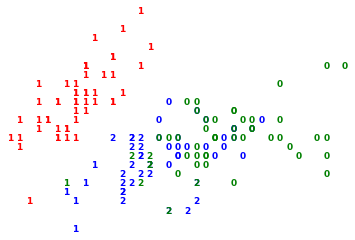

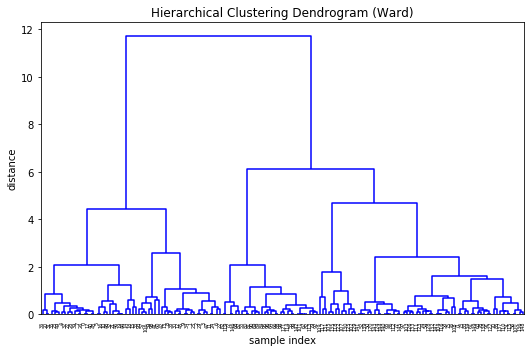

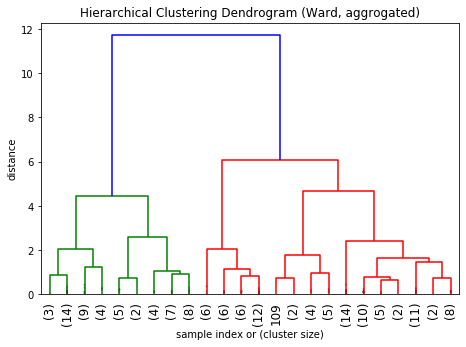

In [5]:
# 2. Hierarchical Clustering - Agglomerative Clustering
# Usual imports
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display

from sklearn import datasets

# import some data to play with
iris = datasets.load_iris()
feat = iris.feature_names
X = iris.data[:, :2]  # we only take the first two features. We could
                      # avoid this ugly slicing by using a two-dim dataset
y = iris.target
y_name = ['Setosa', 'Versicolour', 'Virginica']

from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(linkage="ward", n_clusters=3)
clustering.fit(X);

# MinMax scale the data so that it fits nicely onto the 0.0->1.0 axes of the plot.
from sklearn import preprocessing
X_plot = preprocessing.MinMaxScaler().fit_transform(X)

colours = 'rbg'
for i in range(X.shape[0]):
    plt.text(X_plot[i, 0], X_plot[i, 1], str(clustering.labels_[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 9}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()



from scipy.cluster.hierarchy import dendrogram, linkage

linkage_matrix = linkage(X, 'ward')
figure = plt.figure(figsize=(7.5, 5))
dendrogram(
    linkage_matrix,
    color_threshold=0,
)
plt.title('Hierarchical Clustering Dendrogram (Ward)')
plt.xlabel('sample index')
plt.ylabel('distance')
plt.tight_layout()
plt.show()

figure = plt.figure(figsize=(7.5, 5))
dendrogram(
    linkage_matrix,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=24,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.title('Hierarchical Clustering Dendrogram (Ward, aggrogated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
plt.show()